In [1]:
import numpy as np

In [2]:
class RandomP():
    def __init__(self,X):
        self.X = X
        self.n = X.shape[0]
        self.d = X.shape[-1]
        self.b = 0.4
        
        self.k = self.__estimate_dimension(0.5)
        print(self.k)
    
    def __estimate_dimension(self,epsilon):
        return int(
            np.log(self.n)*(4.+2*self.b)/((epsilon**2/2) - (epsilon**3/3))
        )
        return int(
            np.log(self.n)*(4.+2*self.b)/((epsilon**2/2))
        )
    
#         return int(
#             np.log(self.n)/(epsilon**2)
#         )
    
    def __get_independent_random_matrix(self):  
        i = 0
        while(1):
            self.rm = self.__get_random_matrix()          
            u,d,v = np.linalg.svd(self.rm)
            if np.amin(d) <  0.001:
                continue

            print(i)
            i+=1
            return self.rm
        
    def __get_random_matrix(self):
        rm = np.zeros((self.d,self.k))
        
        for j in range(self.k):
            z = np.random.randn(1,self.d)
            z = z/np.linalg.norm(z)
            rm[:,j] = z
        return rm
        
        
    def project(self):
        self.R = self.__get_independent_random_matrix()
        self.scores = (self.R.T @ self.X.T)
        
        return self.scores.T
        
        
    

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X,y = data['data'],data['target']

In [4]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
rP = RandomP(X)

288


In [6]:
#d = rP.estimate_dimension(0.5)

In [7]:
#print(d)

In [8]:
rp = rP.project()

0


In [9]:
len(rp[0])

288

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def plot_scores_2d(data, colors, grid = True, dim_1 = 1, dim_2 = 2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(15,10))
    plt.axhline(c = 'black', alpha = 0.2)
    plt.axvline(c = 'black', alpha = 0.2)
    plt.scatter(data.T[dim_1 - 1,:], data.T[dim_2 - 1,:], c = colors)
    plt.grid(grid)
    plt.title('Random Projection')
    plt.xlabel('{}st dimension'.format(dim_1))
    plt.ylabel('{}nd dimension'.format(dim_2))
    plt.show()

In [11]:
colors = []
for i in range(len(y)):
    if y[i] == 1:
        colors.append('#FFB300')
    elif y[i] == 2:
        colors.append('#E64A19')
    else:
        colors.append('#00FF00')

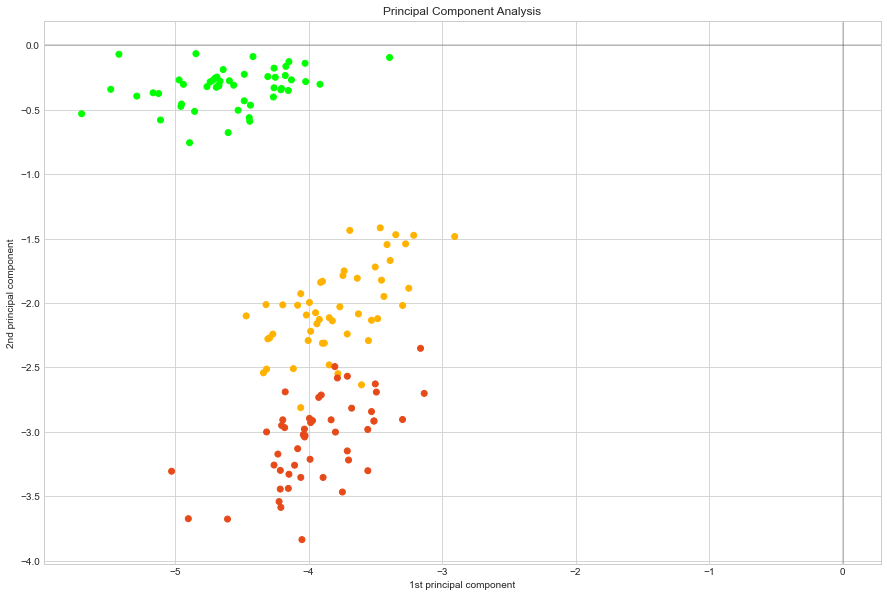

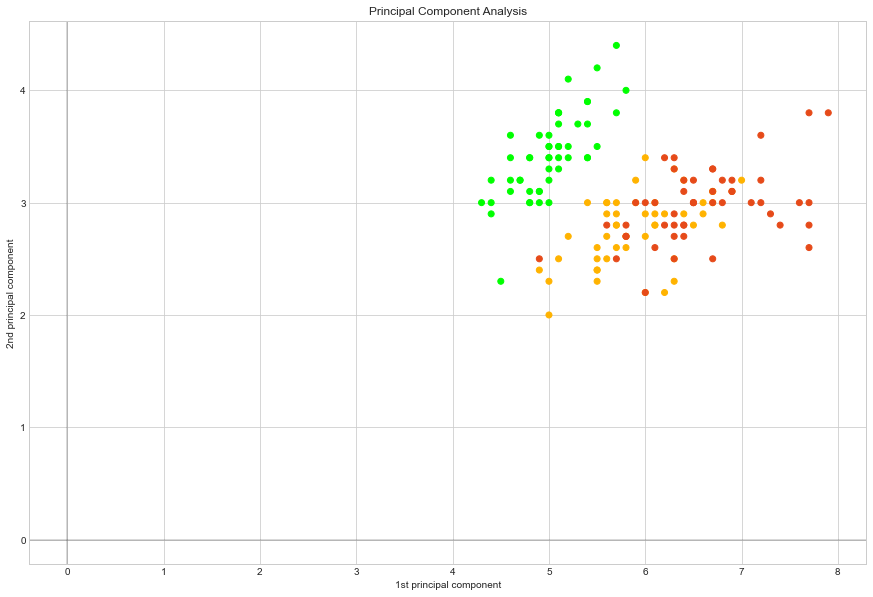

In [12]:
plot_scores_2d(rp,colors = colors)
plot_scores_2d(X,colors = colors)

In [13]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=len(X), eps=0.5)

240

In [20]:
from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(2)
X_new = transformer.fit_transform(X)

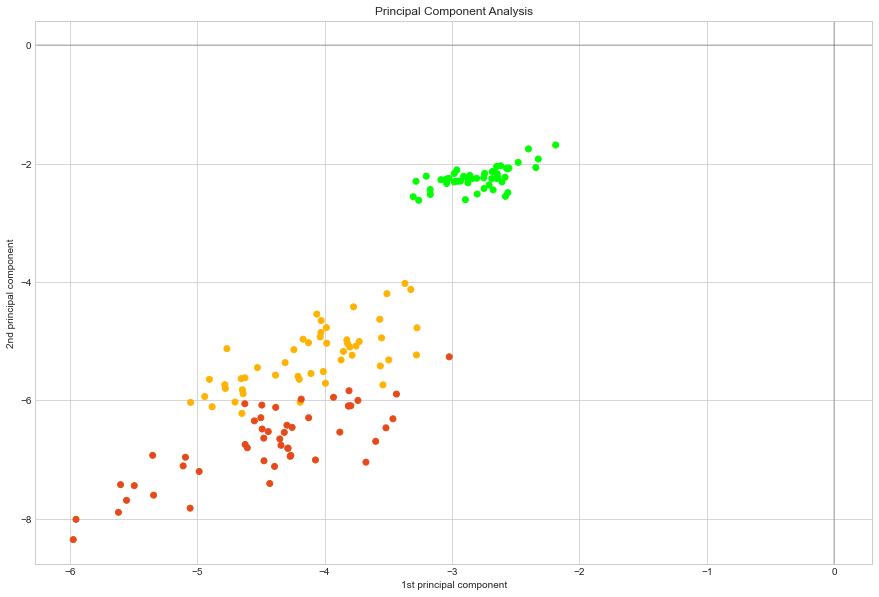

In [21]:
plot_scores_2d(X_new,colors = colors)